<a href="https://colab.research.google.com/github/gustavo-ifusp/prefeitura_smit_sp360/blob/main/estatistica_descritiva_passageiros_tranportados_dias_da_semana_acumulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime, date, timedelta

In [ ]:
dados = pd.DataFrame()
dados = pd.read_csv('fato_total_passageiros_transportados_sptrans.csv')
dados.tail(10)

,data_contabilizacao,dia_da_semana,total_passageiros_transportados,passageiros_pagtes_em_dinheiro,passageiros_comum_e_vt,passageiros_pgts_bu_comum_m,passageiros_pagtes_estudante,passageiros_pgts_bu_est_mensal,passageiros_pgts_bu_vt_mensal,passageiros_pagantes,passageiros_int_onibus_onibus,passageiros_com_gratuidade,passageiros_com_gratuidade_est
910,2021-08-01,Domingo,1392340,117429,657613,35953,3244,22,9,814270,377051,189086,11933
911,2021-08-02,Segunda-feira,4494561,311657,2241423,100502,19298,41,19,2672940,1262525,499463,59633
912,2021-08-03,Terça-feira,4838057,299532,2421517,111446,24922,57,23,2857497,1371212,525091,84257
913,2021-08-04,Quarta-feira,4985943,301444,2486363,115398,27665,45,17,2930932,1399190,561333,94488
914,2021-08-05,Quinta-feira,5086312,307427,2534607,118010,28746,74,28,2988892,1435754,563052,98614
915,2021-08-06,Sexta-feira,5537159,366550,2740300,127022,30802,51,27,3264752,1541411,638870,92126
916,2021-08-07,Sábado,3419556,284744,1664757,87888,13905,67,11,2051372,907874,399412,60898
917,2021-08-08,Domingo,1683558,160330,776474,42842,5766,39,12,985463,448757,222127,27211
918,2021-08-09,Segunda-feira,4916277,337314,2409227,113554,30406,58,15,2890574,1364137,558303,103263
919,2021-08-10,Terça-feira,4900030,307472,2396709,114760,32545,46,25,2851557,1393409,548507,106557


In [ ]:
dados['data'] = pd.to_datetime(dados['data_contabilizacao'])
dados['dia_da_semana'] = dados['dia_da_semana'].astype("category")
dados['mes'] = dados['data'].dt.month
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   data_contabilizacao              920 non-null    object        
 1   dia_da_semana                    920 non-null    category      
 2   total_passageiros_transportados  920 non-null    int64         
 3   passageiros_pagtes_em_dinheiro   920 non-null    int64         
 4   passageiros_comum_e_vt           920 non-null    int64         
 5   passageiros_pgts_bu_comum_m      920 non-null    int64         
 6   passageiros_pagtes_estudante     920 non-null    int64         
 7   passageiros_pgts_bu_est_mensal   920 non-null    int64         
 8   passageiros_pgts_bu_vt_mensal    920 non-null    int64         
 9   passageiros_pagantes             920 non-null    int64         
 10  passageiros_int_onibus_onibus    920 non-null    int64        

In [ ]:
dados_media = dados.groupby(['dia_da_semana', 'mes'], as_index=False)['total_passageiros_transportados'].mean()
dados_media = dados_media.rename(columns={'total_passageiros_transportados': 'media_passageiros_transportados'})
dados_mediana = dados.groupby(['dia_da_semana', 'mes'], as_index=False)['total_passageiros_transportados'].median()
dados_mediana = dados_mediana.rename(columns={'total_passageiros_transportados': 'mediana_passageiros_transportados'})
display(dados_media)
display(dados_mediana)

,dia_da_semana,mes,media_passageiros_transportados
0,Domingo,1,2.005607e+06
1,Domingo,2,2.522319e+06
2,Domingo,3,2.140171e+06
3,Domingo,4,1.713063e+06
4,Domingo,5,1.665768e+06
...,...,...,...
79,Terça-feira,8,5.790514e+06
80,Terça-feira,9,6.676889e+06
81,Terça-feira,10,7.260014e+06
82,Terça-feira,11,7.032917e+06


,dia_da_semana,mes,mediana_passageiros_transportados
0,Domingo,1,1803955.0
1,Domingo,2,2789108.0
2,Domingo,3,2699623.0
3,Domingo,4,1294823.0
4,Domingo,5,1352910.0
...,...,...,...
79,Terça-feira,8,4776075.0
80,Terça-feira,9,4965623.0
81,Terça-feira,10,8725891.0
82,Terça-feira,11,6554431.0


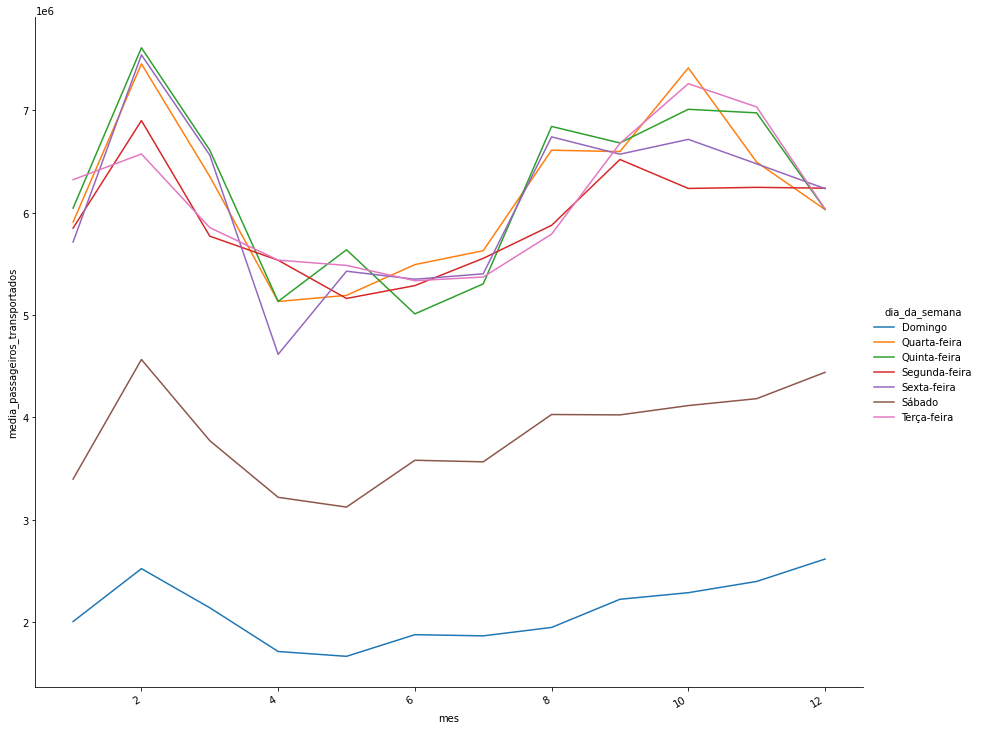

In [ ]:
g = sns.relplot(x="mes", y="media_passageiros_transportados", kind="line", hue="dia_da_semana" , data=dados_media,  height=12)
g.fig.autofmt_xdate()

In [ ]:
dados_mediana = dados_mediana.drop(['dia_da_semana','mes'], axis = 1)
all_data = pd.concat([dados_media, dados_mediana],axis = 1)

In [ ]:
display(all_data)

,dia_da_semana,mes,media_passageiros_transportados,mediana_passageiros_transportados
0,Domingo,1,2.005607e+06,1803955.0
1,Domingo,2,2.522319e+06,2789108.0
2,Domingo,3,2.140171e+06,2699623.0
3,Domingo,4,1.713063e+06,1294823.0
4,Domingo,5,1.665768e+06,1352910.0
...,...,...,...,...
79,Terça-feira,8,5.790514e+06,4776075.0
80,Terça-feira,9,6.676889e+06,4965623.0
81,Terça-feira,10,7.260014e+06,8725891.0
82,Terça-feira,11,7.032917e+06,6554431.0


In [ ]:
all_data.to_csv(r'fato_total_passageiros_transportados_sptrans_export_complet.csv', index = False)

#**Biblioteca plotly**

Gráficos interativos - estudando a biblioteca

In [ ]:
g = sns.relplot(x="mes", y="media_passageiros_transportados", kind="line", hue="dia_da_semana" , data=dados_media,  height=12)
g.fig.autofmt_xdate()

In [ ]:
import plotly.express as px

fig = px.line(dados_media, x="mes", y="media_passageiros_transportados", title='Teste 1', color='dia_da_semana')
fig.show()

#**TESTE para recuperar o nome do arquivo**

In [ ]:
import re
url_arquivo = "https://www.prefeitura.sp.gov.br/cidade/secretarias/upload/26JUL2021.xls"

In [ ]:
nome_arquivo = re.split(r'https://www.prefeitura.sp.gov.br/cidade/secretarias/upload/', url_arquivo)
nome_arquivo = nome_arquivo[1]
nome_arquivo

'26JUL2021.xls'